In [50]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Revise
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/Spinors/rmg_K.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/AHC_code/3P_funcs/rmg_3pV.jl")

bc_sign_alpha_delta (generic function with 1 method)

In [51]:
# Fix mBZ length-scale
mbz_kappa = 1

1

<font size="12">$$(\nu, N_L) \ \mathrm{vs} \ \Delta$$</font>

In [52]:
# N_L layer potential
function rmg_delta_nu_Nl_contour(kappa)
    nu_pts = 10^2
    Nl_pts = 10
    nu_list = range(0, 10^2, nu_pts)
    Nl_list = range(0, Nl_pts, Nl_pts)
    grid = mesh_grid(nu_list, Nl_list, Float64)
    deltas = Array{ComplexF64}(undef, nu_pts * Nl_pts)
    for j in 1:nu_pts * Nl_pts
        deltas[j] = rmg_delta_all(kappa, grid[j, 1], grid[j, 2])
    end

    fig = Figure(size=(2600, 1500), fontsize=50, fonts = (; regular = "italic", weird = "bold"))

    ax1 = Axis(fig[1, 1], title = L" (\nu, N_L) \ \mathrm{vs} \ \frac{1}{\pi} Arg(\Delta)", xlabel = L"\nu", ylabel = L"N_L")
    tricontourf!(ax1, grid[:, 1], grid[:, 2], 1/pi * angle.(deltas), colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid[:, 1], grid[:, 2], 1/pi * angle.(deltas), colormap = :Spectral)
    cb1 = Colorbar(fig[1, 2], tr1)

    ax2 = Axis(fig[1, 3], title = L"(\nu, N_L) \ \mathrm{vs} \ |\Delta|", xlabel = L"\nu", ylabel = L"N_L")
    tricontourf!(ax2, grid[:, 1], grid[:, 2], abs.(deltas), colormap = :Spectral)
    X, ax2, tr2 = tricontourf(grid[:, 1], grid[:, 2], abs.(deltas), colormap = :Spectral)
    cb2 = Colorbar(fig[1, 4], tr2)
    
    fig
end


rmg_delta_nu_Nl_contour (generic function with 1 method)

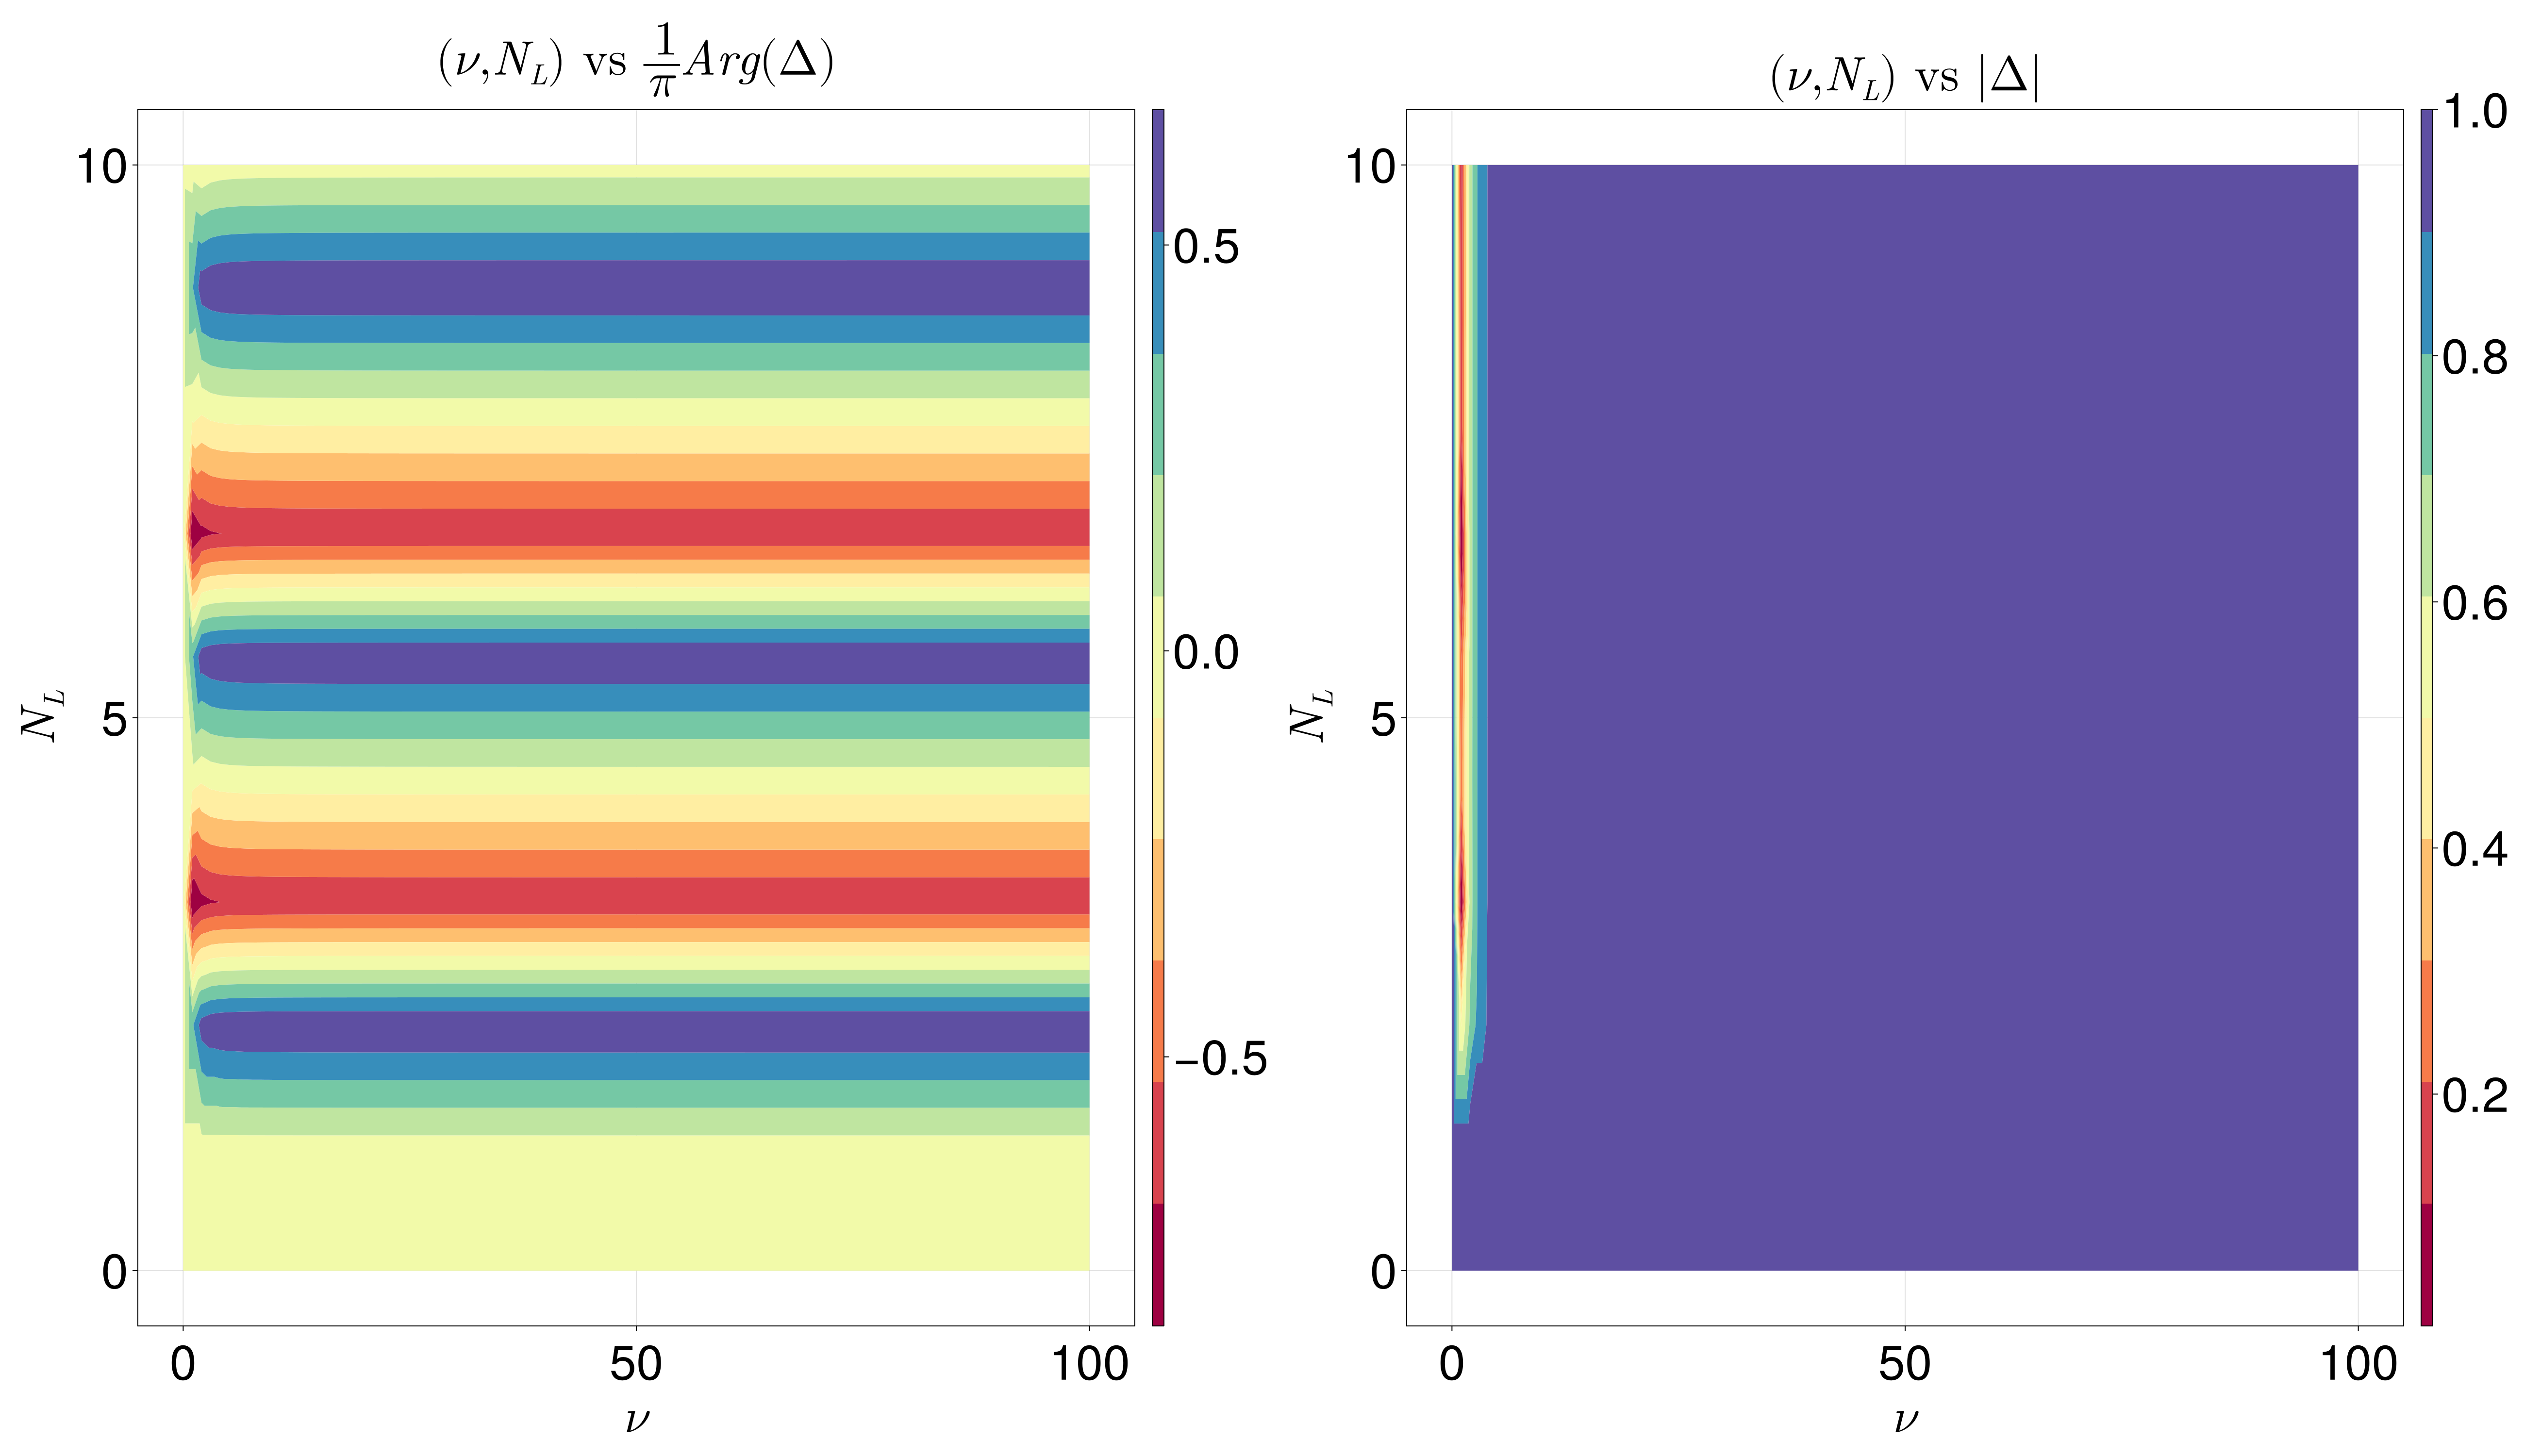

In [53]:
rmg_delta_nu_Nl_contour(mbz_kappa)

<font size="12">$$(\nu, N_L) \ \mathrm{vs} \ \alpha$$</font>

In [54]:
# N_L layer potential
function rmg_alpha_nu_Nl_contour(kappa)
    nu_pts = 10^2
    Nl_pts = 10
    nu_list = range(0, 10^2, nu_pts)
    Nl_list = range(0, Nl_pts, Nl_pts)
    grid = mesh_grid(nu_list, Nl_list, Float64)
    alphas = Array{ComplexF64}(undef, nu_pts * Nl_pts)
    for j in 1:nu_pts * Nl_pts
        alphas[j] = rmg_alpha_all(kappa, grid[j, 1], grid[j, 2])
    end

    fig = Figure(size=(2600, 1500), fontsize=50, fonts = (; regular = "italic", weird = "bold"))

    ax1 = Axis(fig[1, 1], title = L" (\nu, N_L) \ \mathrm{vs} \ \frac{1}{\pi} Arg(\alpha)", xlabel = L"\nu", ylabel = L"N_L")
    tricontourf!(ax1, grid[:, 1], grid[:, 2], 1/pi * angle.(alphas), colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid[:, 1], grid[:, 2], 1/pi * angle.(alphas), colormap = :Spectral)
    cb1 = Colorbar(fig[1, 2], tr1)

    ax2 = Axis(fig[1, 3], title = L"(\nu, N_L) \ \mathrm{vs} \ |\alpha|", xlabel = L"\nu", ylabel = L"N_L")
    tricontourf!(ax2, grid[:, 1], grid[:, 2], abs.(alphas), colormap = :Spectral)
    X, ax2, tr2 = tricontourf(grid[:, 1], grid[:, 2], abs.(alphas), colormap = :Spectral)
    cb2 = Colorbar(fig[1, 4], tr2)
    
    fig
end


rmg_alpha_nu_Nl_contour (generic function with 1 method)

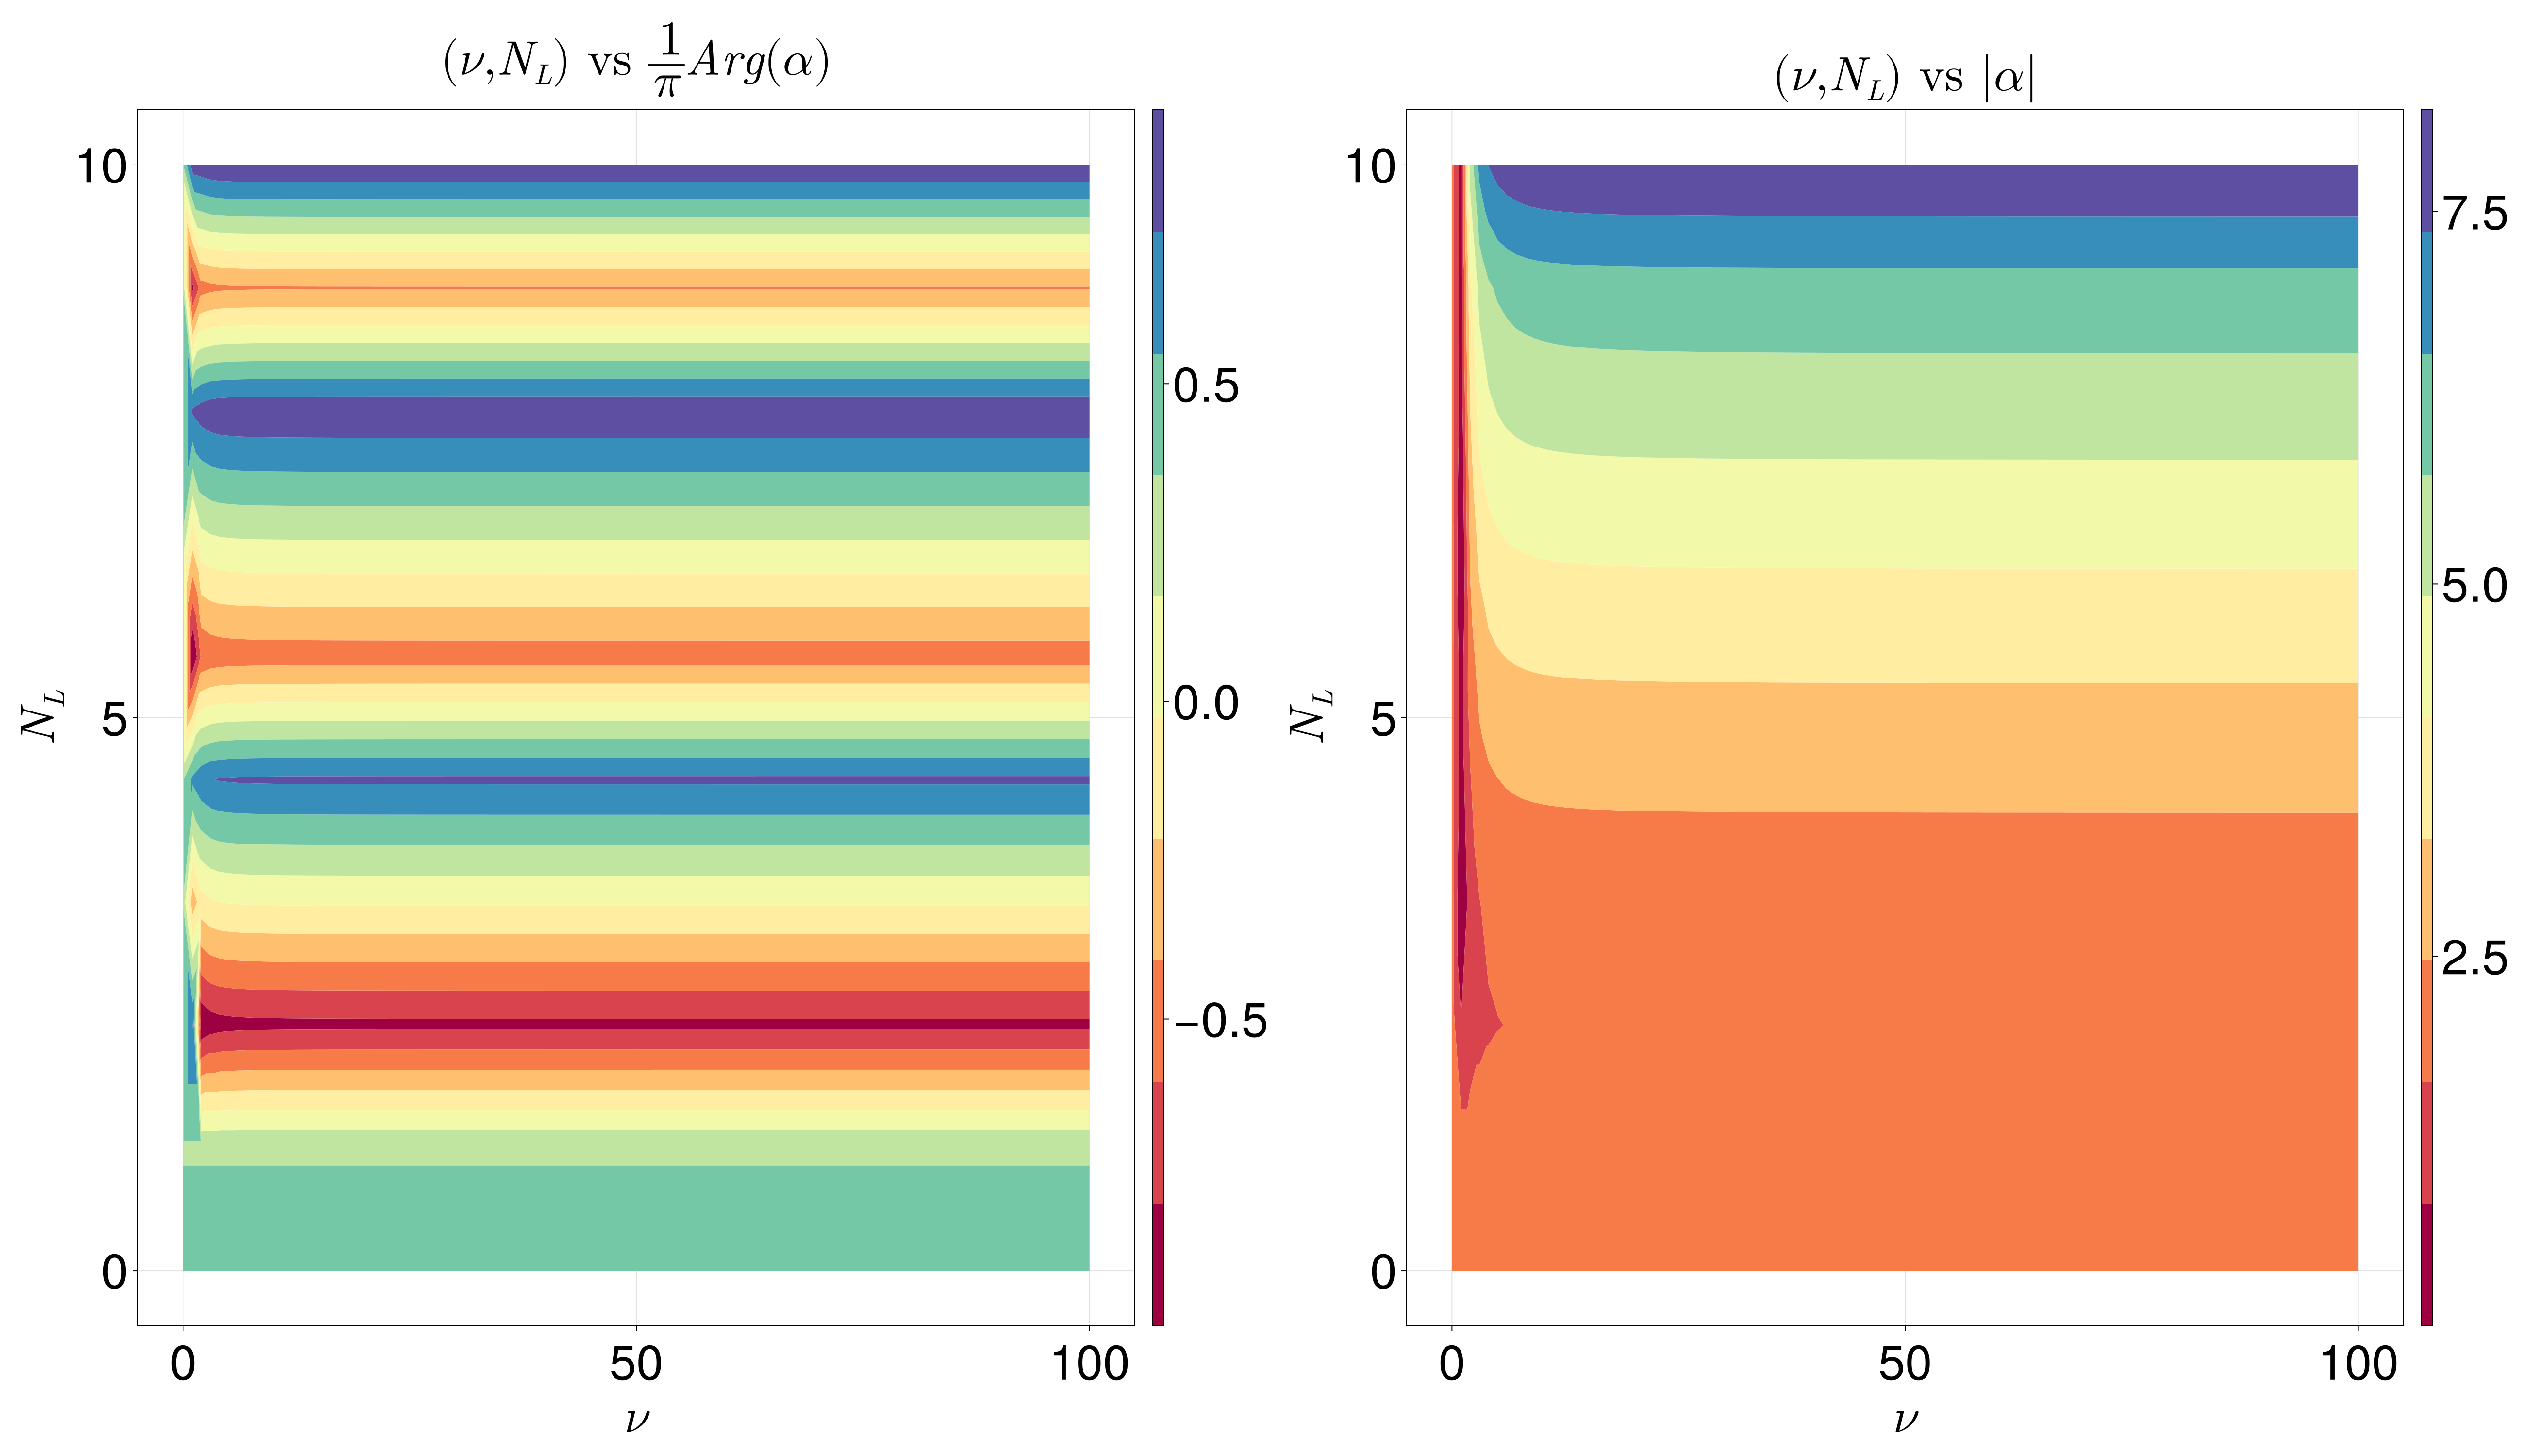

In [55]:
rmg_alpha_nu_Nl_contour(mbz_kappa)

<font size="12">$$N_L \text{-Layer Potential}$$</font>

In [56]:
# N_L layer potential
function rmg_delta_nu_Nl_all(kappa)
    P = Figure(size=(4300, 2000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    
    nu_pts = 10^2
    Nl_max = 5
    nu_list = range(0, 10, nu_pts)
    Nl_list = collect(1:Nl_max)
    deltas = Array{ComplexF64}(undef, Nl_max, nu_pts, 2)

    for j in 1:Nl_max
        for i in 1:nu_pts
            deltas[j, i, 1] = rmg_delta_all(kappa, nu_list[i], Nl_list[j])
            deltas[j, i, 2] = limit_delta_all(Nl_list[j])
        end
        big_ax = Axis(P[:, j], title = string("N_L = ")*string(Nl_list[j]), titlegap = 160, titlefont = :weird, titlesize = 50)
        hidedecorations!(big_ax, label = false)
        hidespines!(big_ax)

        ax1 = Axis(P[1, j], xlabel = L"\nu", ylabel = L"\frac{1}{\pi}arg(\Delta)", title = L"\nu \text{ vs } \frac{1}{\pi}arg(\Delta)", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, nu_list, 1/pi * angle.(deltas[j, :, 1]), label = "Exact")
        lines!(ax1, nu_list, 1/pi * angle.(deltas[j, :, 2]), label = "Limit")

        ax2 = Axis(P[2, j], xlabel = L"\nu", ylabel = L"|\Delta|", title = L"\nu \text{ vs } |\Delta|", 
        titlefont = :regular, titlegap = 20)
        lines!(ax2, nu_list, abs.(deltas[j, :, 1]), label = "Exact")
        lines!(ax2, nu_list, abs.(deltas[j, :, 2]), label = "Limit")
    end
    P
end


rmg_delta_nu_Nl_all (generic function with 1 method)

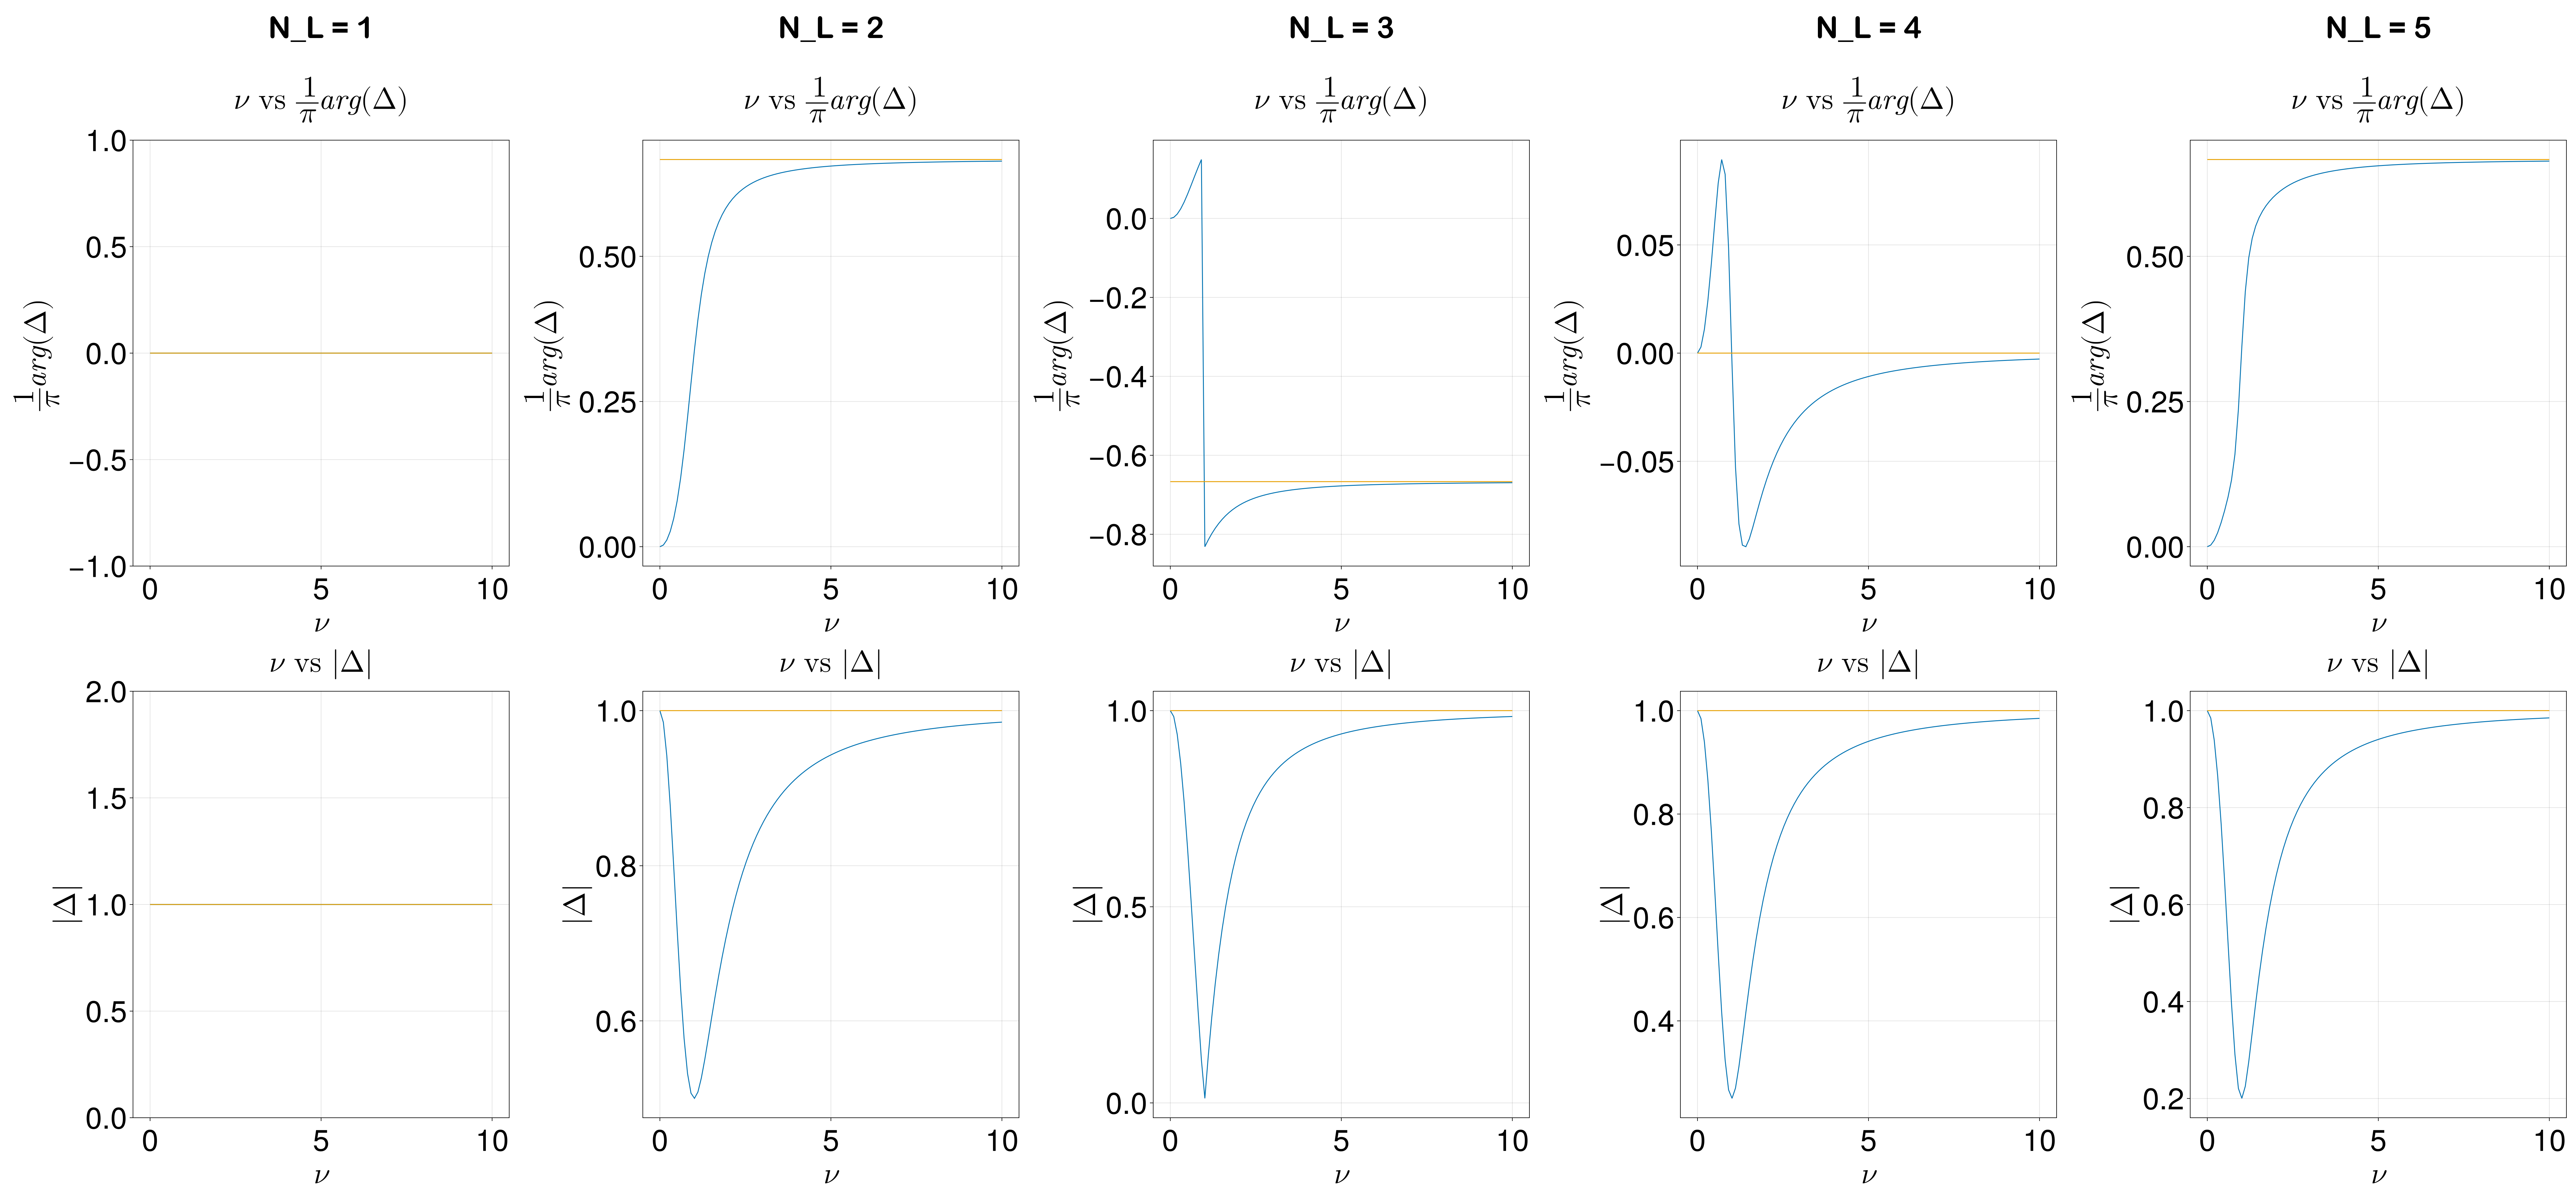

In [57]:
rmg_delta_nu_Nl_all(mbz_kappa)

In [58]:
# N_L layer potential
function rmg_alpha_nu_Nl_all(kappa)
    P = Figure(size=(4300, 2000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    
    nu_pts = 10^2
    Nl_max = 5
    nu_list = range(0, 10, nu_pts)
    Nl_list = collect(1:Nl_max)
    alphas = Array{ComplexF64}(undef, Nl_max, nu_pts, 2)

    for j in 1:Nl_max
        for i in 1:nu_pts
            alphas[j, i, 1] = rmg_alpha_all(kappa, nu_list[i], Nl_list[j])
            alphas[j, i, 2] = limit_alpha_all(kappa, Nl_list[j])
        end
        big_ax = Axis(P[:, j], title = string("N_L = ")*string(Nl_list[j]), titlegap = 160, titlefont = :weird, titlesize = 50)
        hidedecorations!(big_ax, label = false)
        hidespines!(big_ax)

        ax1 = Axis(P[1, j], xlabel = L"\nu", ylabel = L"\frac{1}{\pi}arg(\alpha)", title = L"\nu \text{ vs } \frac{1}{\pi}arg(\alpha)", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, nu_list, 1/pi * angle.(alphas[j, :, 1]), label = "Exact")
        lines!(ax1, nu_list, 1/pi * angle.(alphas[j, :, 2]), label = "Limit")

        ax2 = Axis(P[2, j], xlabel = L"\nu", ylabel = L"|\alpha|", title = L"\nu \text{ vs } |\alpha|", 
        titlefont = :regular, titlegap = 20)
        lines!(ax2, nu_list, abs.(alphas[j, :, 1]), label = "Exact")
        lines!(ax2, nu_list, abs.(alphas[j, :, 2]), label = "Limit")
    end
    P
end


rmg_alpha_nu_Nl_all (generic function with 1 method)

In [59]:
rmg_alpha_nu_Nl_all(mbz_kappa)

<img width=4300 height=2000 style='object-fit: contain; height: auto;' src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAIZgAAA+gCAIAAADO0xJIAAAABmJLR0QA/wD/AP+gvaeTAAAgAElEQVR4nOzde5zNdf4H8DPGPZQy1RY/LVGR2kTuPUorl58uurglrUvK5pKkn0oXoYiK6LchJZcU2RTpwkqbspFUCKESSoMyxsy4jJnfH+2j3261M9+ZOd9zZng+/5zz/n4+L2r+6NU5552QnZ0dAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAI5txeIdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIg/i0wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAi0wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAi0wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAiEUmAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMQiEwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBikQkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQscgEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiFhkAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEQsMgEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiFpkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEYtMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgIhFJgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDEIhMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgYpEJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAELHIBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIhYZAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABELDIBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIhaZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABGLTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICIRSYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAxCITAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIGKRCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCxyAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIWGQCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARCwyAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIWmQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARi0wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAiEUmAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMQiEwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACBikQkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQscgEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiFhkAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEQsMgEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiFpkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEYtMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgIhFJgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEDEIhMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgYpEJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAELHIBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIhYZAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABELDIBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIhaZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABGLTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAICIRSYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAxCITAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIGKRCQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCxyAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIWGQCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARCwyAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACIWmQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARi0wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAiEUmAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQMQiEwAAflNqauqECRMuu+yypKSkkiVLnnLKKU2bNn300Uf37t0byxgZGRmjR49u2LBhxYoVy5QpU61ate7du69evTqWGWLpzTffbN++fZUqVUqXLn3SSSc1bNhwxIgRKSkp8c4FAAAAAEGpFuNCtQgAAABAUadajAvVIgAAAAC/SV8XF/o6Cm7Tpk09e/asUqVKyZIlK1WqVK9evcGDB2/bti3euQAAAIBjiHYxLrSLAEBIErKzs+OdAQCAwmX27Nl9+/ZNTk7+9UsnnXTSpEmTrrnmmhjE2LJlS8uWLbds2fKLnxcrVmzYsGH33HNPDDLETEZGRpcuXf7617/++qWTTjpp9uzZzZs3j30qiooVK1bcf//9K1euTE1NPfnkk1u0aHHfffdVq1Yt3rkAAACAY45qMfZUi+QgKytr3bp1y5cv//TTT7/++uutW7fu2bMnPT09PT29WLFiZcuWPe6448qXL1+1atVq1apVq1atXr16DRs2LF26dLyDAwAAAMcc1WLsqRbJ2ebNm1esWLFq1apNmzZt27Zt586daWlpGRkZCQkJZcqUOf744ytXrnzGGWecf/759erVa9q0aalSpeIdGQAAAIgafV3s6euIirlz53bt2jU9Pf0XPy9VqtT48eNvvvnmuKQCAAAAjinaxdjTLgIAobLIBACAf/PQQw898MADOQwkJCT85S9/ueWWW0KNkZaWdv755/+6AfzZ5MmTe/bsGWqGWPrv//7vhQsX/qdXS5Qo8e677zZq1CiWkSgq1qxZ06RJk9TU1H/94XHHHbdw4cKLL744XqkAAACAY5BqMS5Ui/zakSNH3n777dmzZ7/66qs//vhjnp4tWbJk/fr1r7322s6dO59yyikhJQQAAAD4V6rFuFAt8ptWr149ffr0+fPnb968OfhTZcuWveyyy7p27XrllVeWLFkyvHgAAABADOjr4kJfR8EtWLCgXbt2mZmZ/2ngpZdeat++fSwjAQAAAMca7WJcaBf52aeffjp16tQPP/xwy5YtKSkpBw8ejOLhZcuWPeGEE2rWrNmsWbMuXbrUrFkziocDUJhZZAIAwP+bNWtW586dcx1LTEx8/fXXW7ZsGV6SXLvIChUq7Nixo1y5cuFliJnnn3/+T3/6U84z1atX37hxY2JiYkwSUWSkpKRceOGFv1mXV6pUaf369ZUqVYp9KgAAAOAYpFqMC9Uiv5Cenj5lypQnnnjiq6++KuBRxYsXb9OmzZAhQ+rXrx+VbAAAAAC/SbUYF6pFfiErK2v27NmPPfbYRx99VJBzTj311EGDBvXu3btMmTLRygYAAADEkr4uLvR1FNzHH3/crFmz9PT0HGaSkpK2bt2quwMAAABCol2MC+0iPzlw4ECfPn2mTJkSm+sSExMHDRr08MMPJyQkxOZGAOKoWLwDAABQWKSlpd1+++1BJo8cOXLTTTft3r07vDC59iD79u176aWXwgsQS+PGjct1ZsuWLfPmzYtBGIqWbt26/ael37t373788cdjnAcAAAA4NqkW40W1yM+ys7NnzJhx1lln9evXr+BbTCKRSGZm5muvvXbRRRd17NgxOTm54AcCAAAA/JpqMV5Ui/yrRYsW1alTp1OnTgXcYhKJRHbu3Dlw4MBzzjnn9ddfj0o2AAAAIJb0dfGir6OAdu3adfXVV

In [60]:
# N_L layer potential
function rmg_ratio_nu_Nl_all(kappa)
    P = Figure(size=(4300, 2000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    
    nu_pts = 10^2
    Nl_max = 5
    nu_list = range(0, 10^2, nu_pts)
    Nl_list = collect(1:Nl_max)
    ratios = Array{ComplexF64}(undef, Nl_max, nu_pts)

    for j in 1:Nl_max
        for i in 1:nu_pts
            ratios[j, i] = rmg_delta_all(kappa, nu_list[i], Nl_list[j]) / rmg_alpha_all(kappa, nu_list[i], Nl_list[j])
        end
        big_ax = Axis(P[:, j], title = string("N_L = ")*string(Nl_list[j]), titlegap = 160, titlefont = :weird, titlesize = 50)
        hidedecorations!(big_ax, label = false)
        hidespines!(big_ax)

        ax1 = Axis(P[1, j], xlabel = L"\nu", ylabel = L"\frac{1}{\pi}arg(\frac{\Delta}{\alpha})", 
        title = L"\nu \text{ vs } \frac{1}{\pi}arg(\frac{\Delta}{\alpha})", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, nu_list, 1/pi * angle.(ratios[j, :]))

        ax2 = Axis(P[2, j], xlabel = L"\nu", ylabel = L"|\frac{\Delta}{\alpha}|", title = L"\nu \text{ vs } |\frac{\Delta}{\alpha}|", 
        titlefont = :regular, titlegap = 20)
        lines!(ax2, nu_list, abs.(ratios[j, :]))
    end
    P
end


rmg_ratio_nu_Nl_all (generic function with 1 method)

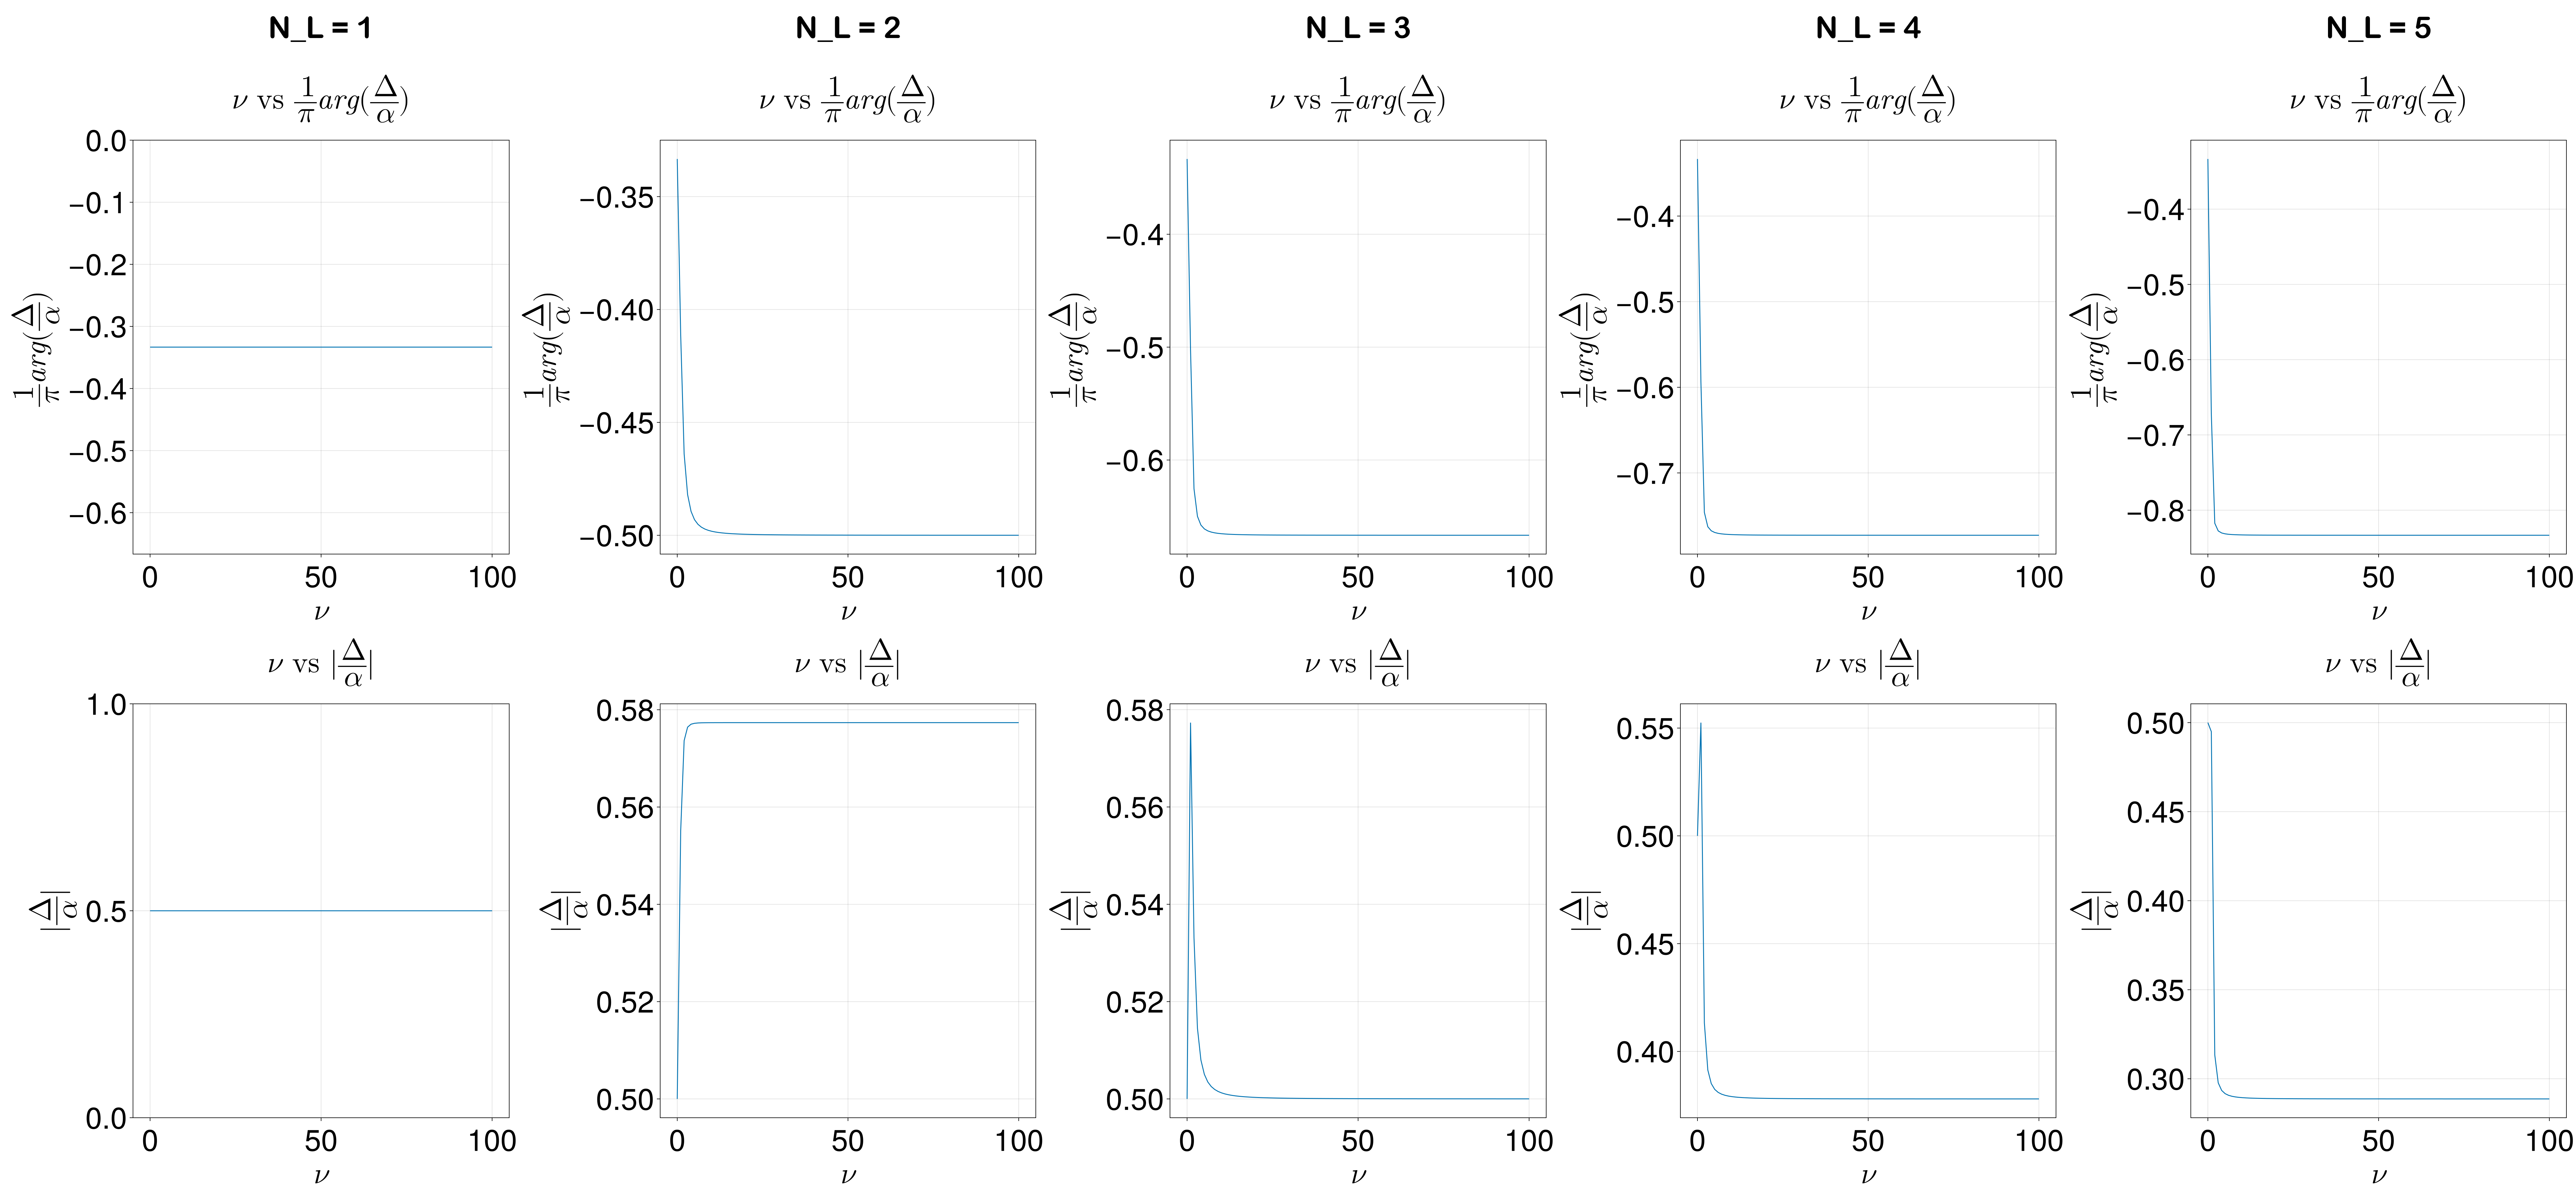

In [61]:
rmg_ratio_nu_Nl_all(mbz_kappa)

<font size="12">$$1 \text{-Layer Potential}$$</font>

In [62]:
Nl = 3

3

In [63]:
# 1 layer potential
function rmg_delta_nu_Nl_1l(kappa, Nl)
    P = Figure(size=(4300, 2000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    
    nu_pts = 10^2
    nu_list = range(0, 10, nu_pts)
    l_list = collect(1:Nl)
    deltas = Array{ComplexF64}(undef, Nl, nu_pts, 2)

    for l in 1:Nl
        for i in 1:nu_pts
            deltas[l, i, 1] = rmg_delta_layers(kappa, nu_list[i], Nl, [l])
            deltas[l, i, 2] = limit_delta_l(kappa, nu_list[i], Nl, [l])
        end
        big_ax = Axis(P[:, l], title = string("l = ")*string(l_list[l]), titlegap = 160, titlefont = :weird, titlesize = 50)
        hidedecorations!(big_ax, label = false)
        hidespines!(big_ax)

        ax1 = Axis(P[1, l], xlabel = L"\nu", ylabel = L"\frac{1}{\pi}arg(\Delta)", title = L"\nu \text{ vs } \frac{1}{\pi}arg(\Delta)", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, nu_list, 1/pi * angle.(deltas[l, :, 1]), label = "Exact")
        lines!(ax1, nu_list, 1/pi * angle.(deltas[l, :, 2]), label = "Limit")

        ax2 = Axis(P[2, l], xlabel = L"\nu", ylabel = L"|\Delta|", title = L"\nu \text{ vs } |\Delta|", 
        titlefont = :regular, titlegap = 20)
        lines!(ax2, nu_list, abs.(deltas[l, :, 1]), label = "Exact")
        lines!(ax2, nu_list, abs.(deltas[l, :, 2]), label = "Limit")
    end
    P
end


rmg_delta_nu_Nl_1l (generic function with 1 method)

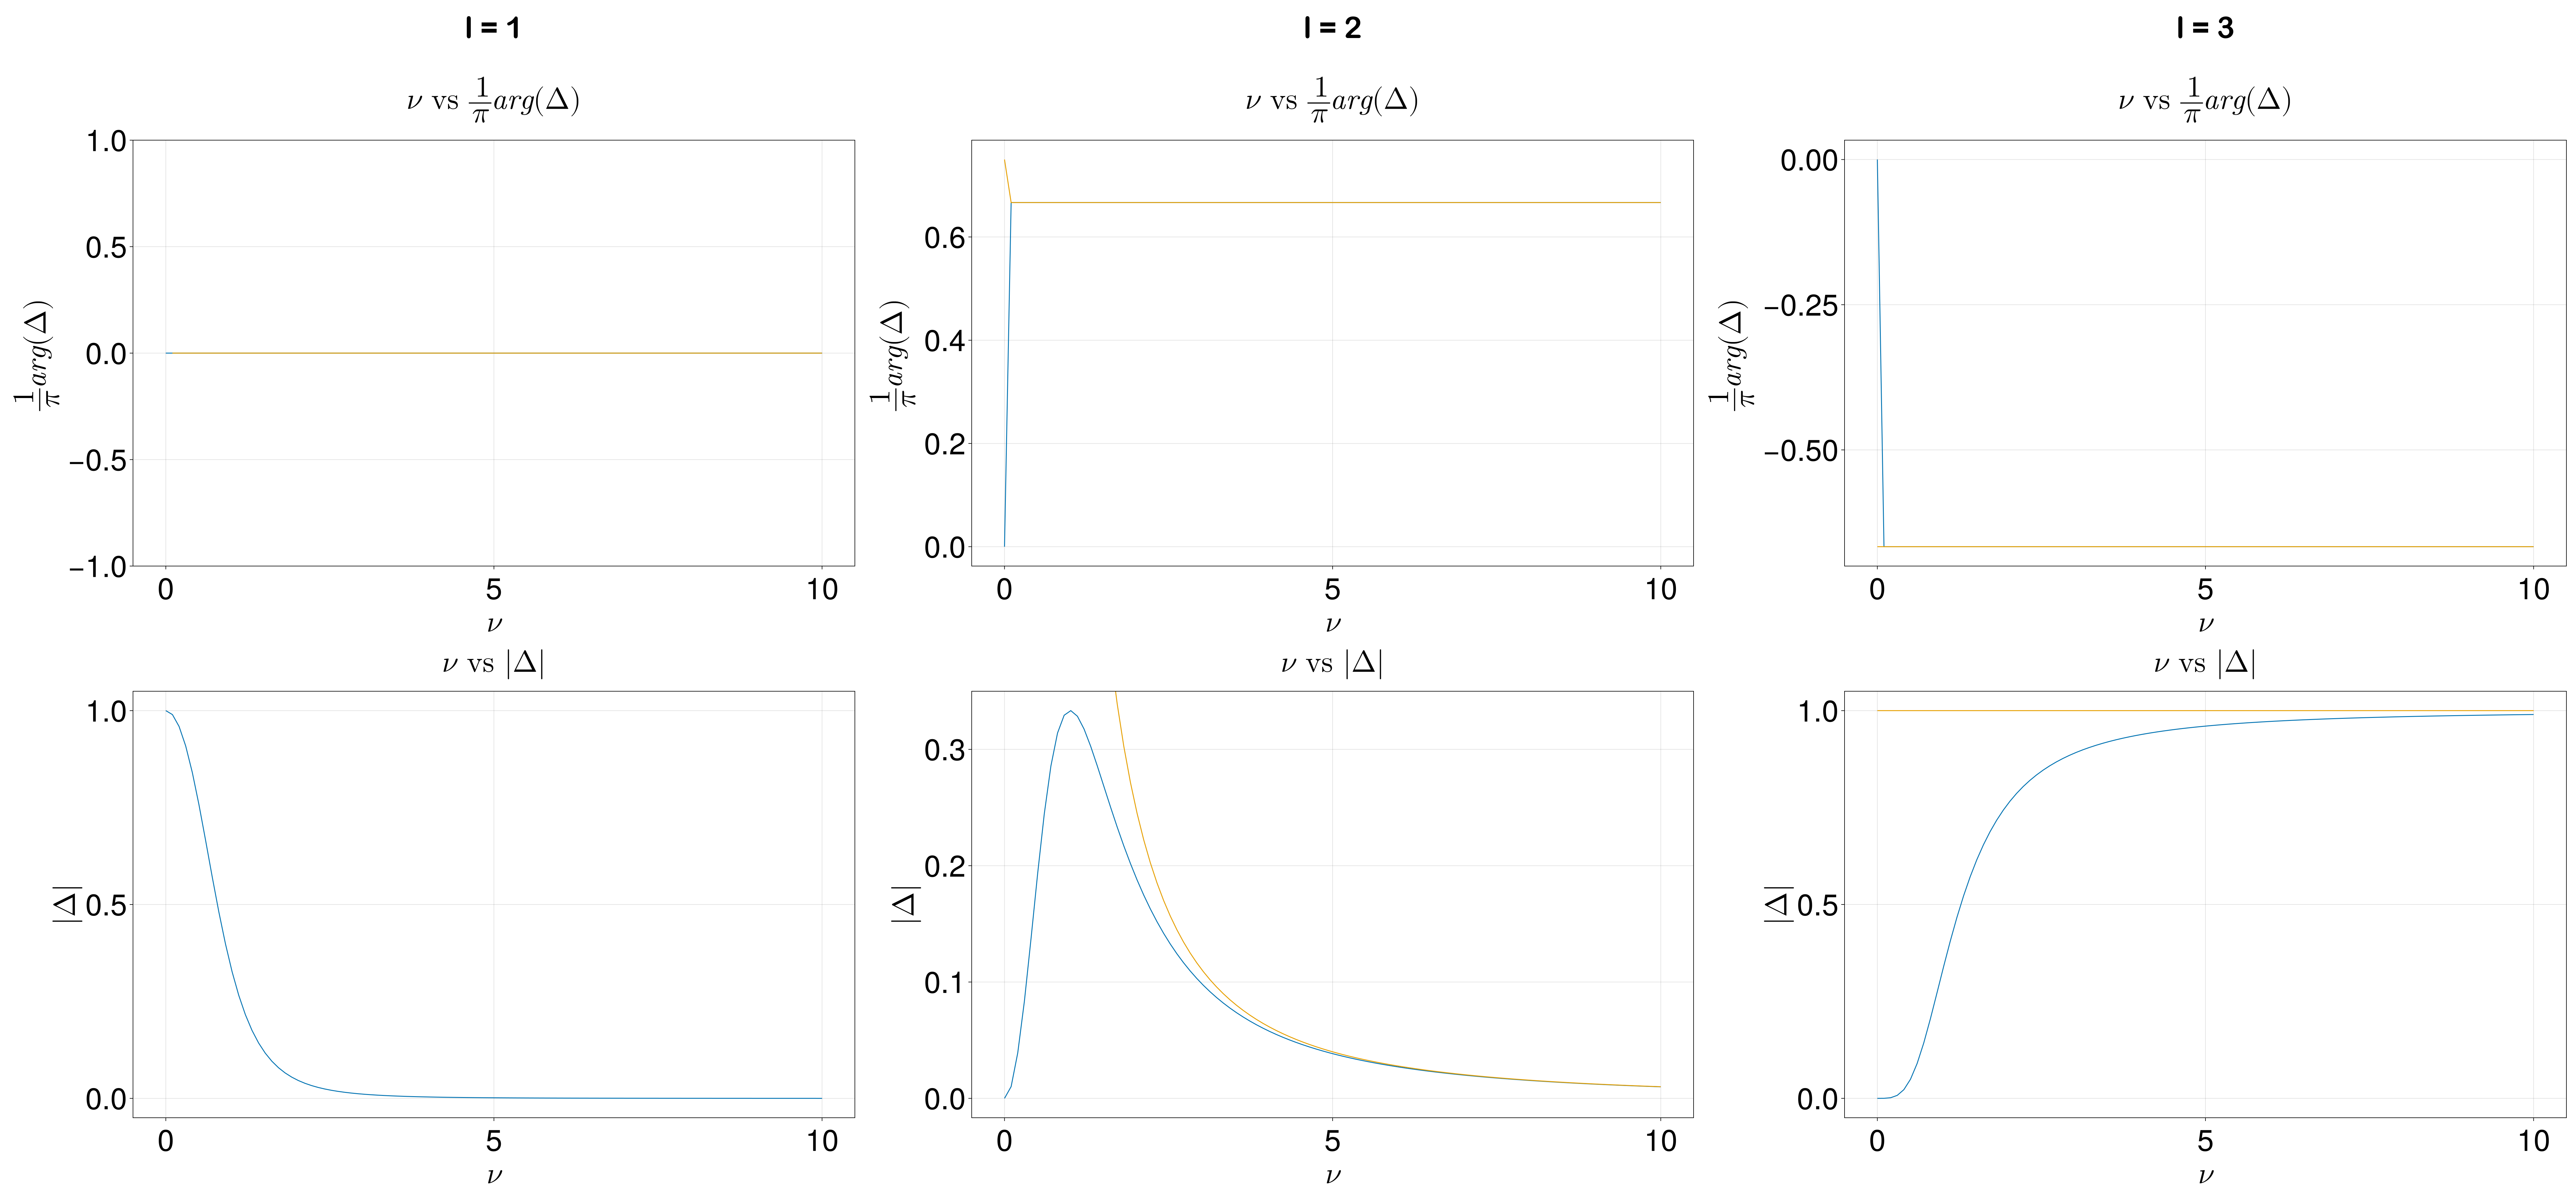

In [64]:
rmg_delta_nu_Nl_1l(mbz_kappa, Nl)

In [65]:
# 1 layer potential
function rmg_alpha_nu_Nl_1l(kappa, Nl)
    P = Figure(size=(4300, 2000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    
    nu_pts = 10^2
    nu_list = range(0, 10, nu_pts)
    l_list = collect(1:Nl)
    alphas = Array{ComplexF64}(undef, Nl, nu_pts, 2)

    for l in 1:Nl
        for i in 1:nu_pts
            alphas[l, i, 1] = rmg_alpha_layers(kappa, nu_list[i], Nl, [l])
            alphas[l, i, 2] = limit_alpha_l(kappa, nu_list[i], Nl, [l])
        end
        big_ax = Axis(P[:, l], title = string("l = ")*string(l_list[l]), titlegap = 160, titlefont = :weird, titlesize = 50)
        hidedecorations!(big_ax, label = false)
        hidespines!(big_ax)

        ax1 = Axis(P[1, l], xlabel = L"\nu", ylabel = L"\frac{1}{\pi}arg(\alpha)", title = L"\nu \text{ vs } \frac{1}{\pi}arg(\alpha)", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, nu_list, 1/pi * angle.(alphas[l, :, 1]), label = "Exact")
        lines!(ax1, nu_list, 1/pi * angle.(alphas[l, :, 2]), label = "Limit")

        ax2 = Axis(P[2, l], xlabel = L"\nu", ylabel = L"|\alpha|", title = L"\nu \text{ vs } |\alpha|", 
        titlefont = :regular, titlegap = 20)
        lines!(ax2, nu_list, abs.(alphas[l, :, 1]), label = "Exact")
        lines!(ax2, nu_list, abs.(alphas[l, :, 2]), label = "Limit")
    end
    P
end


rmg_alpha_nu_Nl_1l (generic function with 1 method)

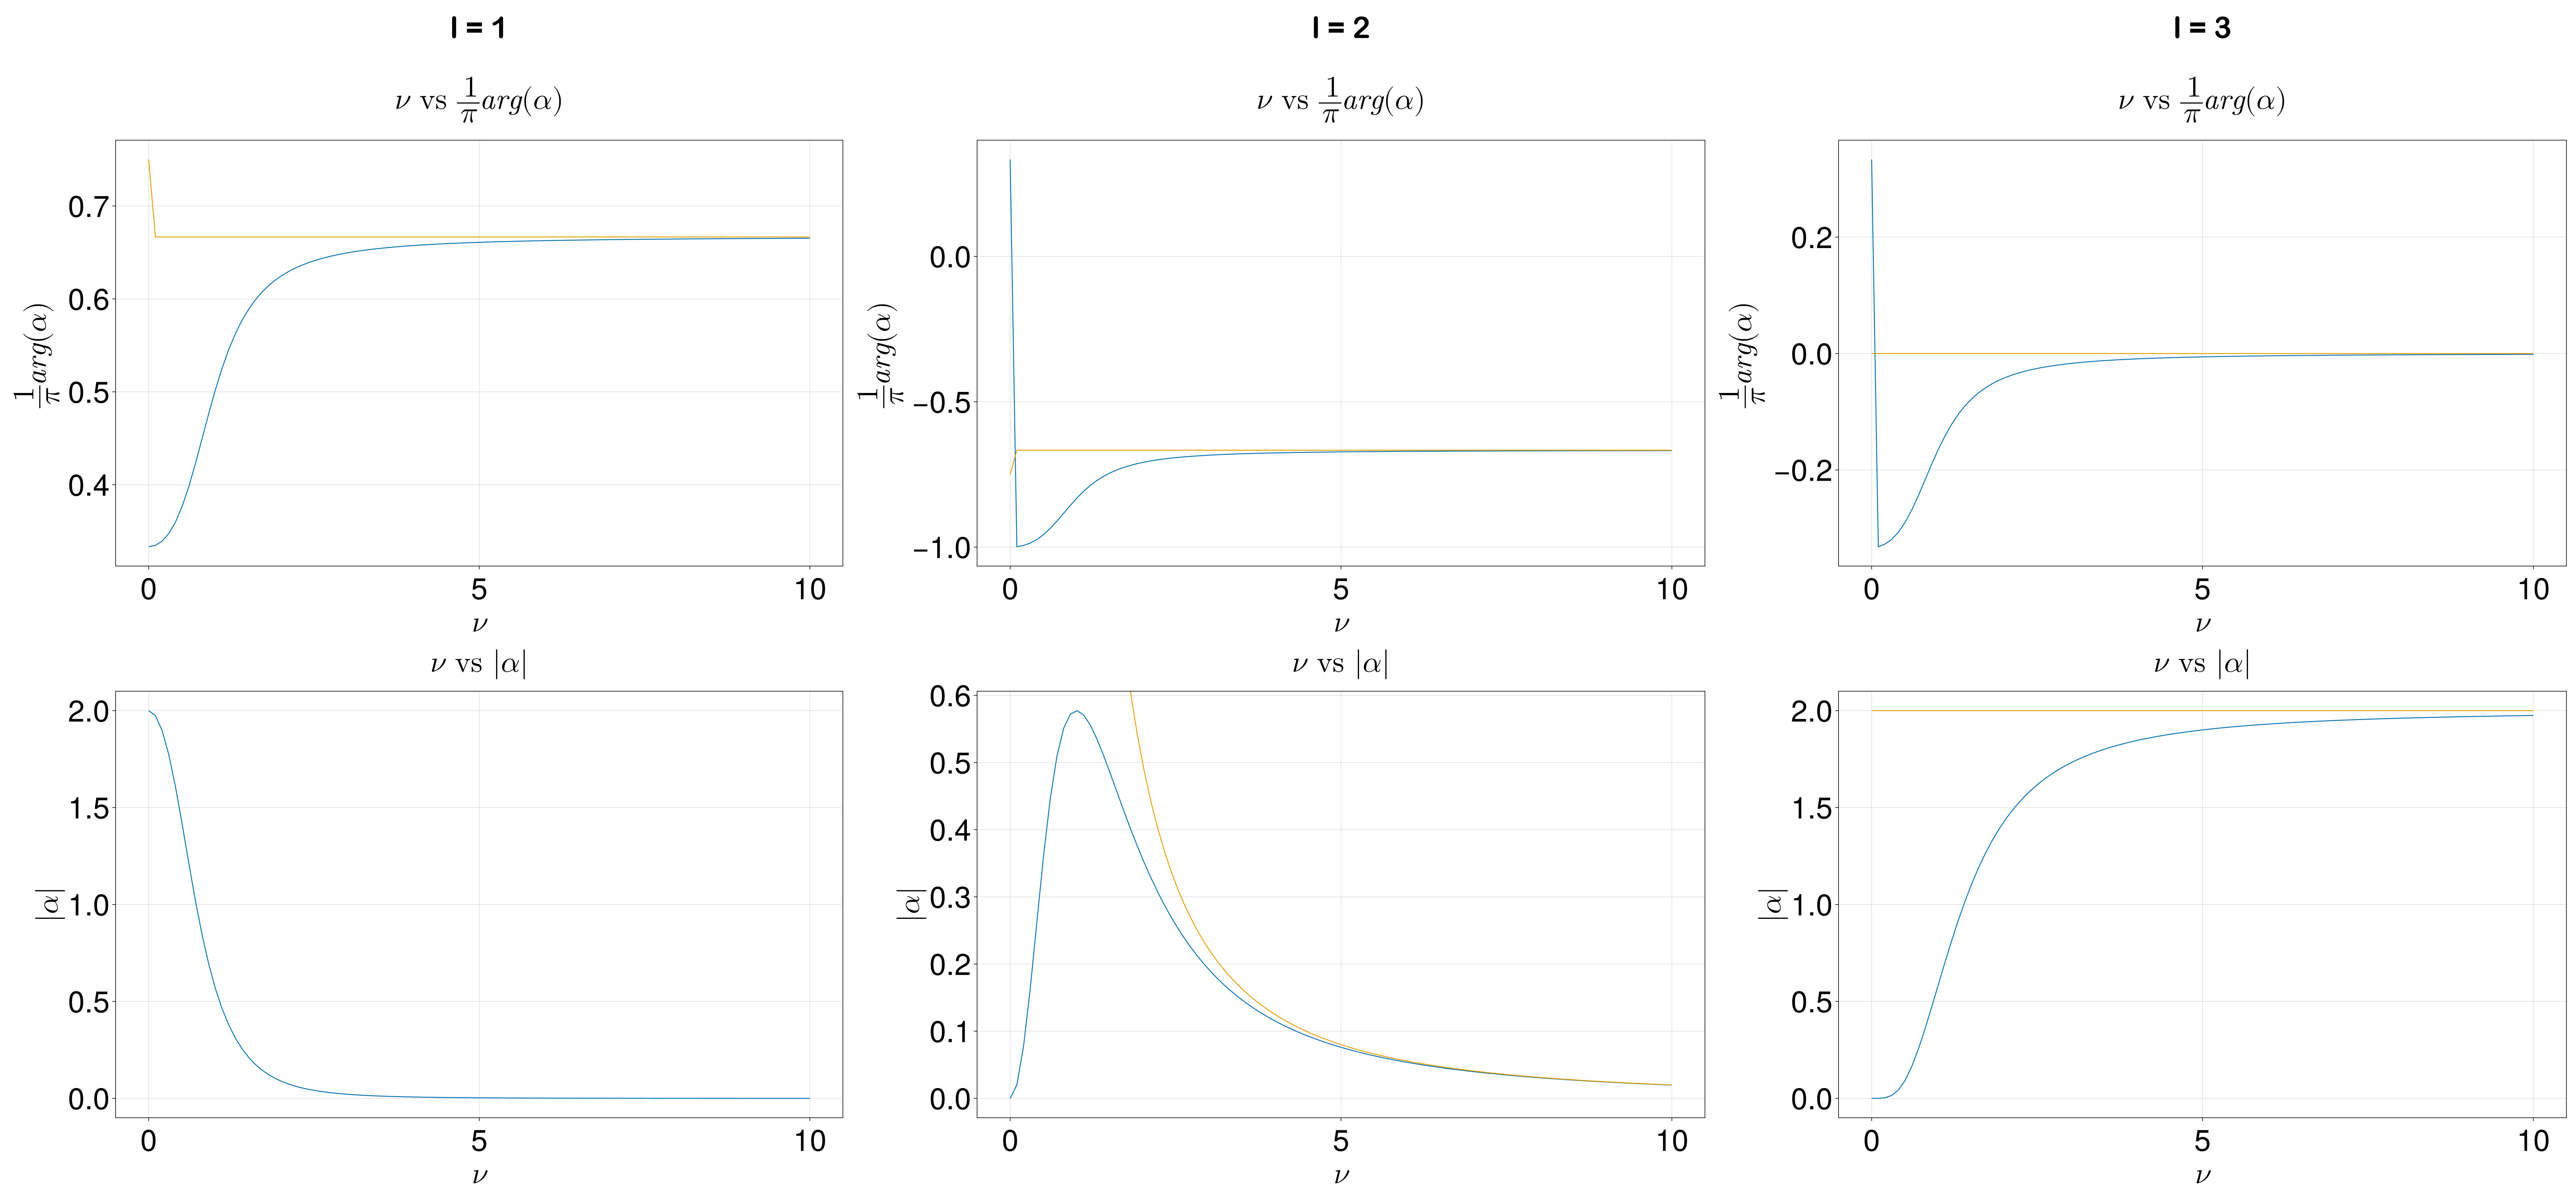

In [66]:
rmg_alpha_nu_Nl_1l(mbz_kappa, Nl)

In [67]:
# 1 layer potential
function rmg_ratio_nu_Nl_1l(kappa, Nl)
    P = Figure(size=(4300, 2000), fontsize=50, fonts = (; regular = "italic", weird = "bold"))
    
    nu_pts = 10^2
    nu_list = range(0, 10^2, nu_pts)
    l_list = collect(1:Nl)
    ratios = Array{ComplexF64}(undef, Nl, nu_pts)

    for l in 1:Nl
        for i in 1:nu_pts
            ratios[l, i] = rmg_delta_layers(kappa, nu_list[i], Nl, [l]) / rmg_alpha_layers(kappa, nu_list[i], Nl, [l])
        end
        big_ax = Axis(P[:, l], title = string("l = ")*string(l_list[l]), titlegap = 160, titlefont = :weird, titlesize = 50)
        hidedecorations!(big_ax, label = false)
        hidespines!(big_ax)

        ax1 = Axis(P[1, l], xlabel = L"\nu", ylabel = L"\frac{1}{\pi}arg(\frac{\Delta}{\alpha})", 
        title = L"\nu \text{ vs } \frac{1}{\pi}arg(\frac{\Delta}{\alpha})", 
        titlefont = :regular, titlegap = 20)
        lines!(ax1, nu_list, 1/pi * angle.(ratios[l, :]))

        ax2 = Axis(P[2, l], xlabel = L"\nu", ylabel = L"|\frac{\Delta}{\alpha}|", title = L"\nu \text{ vs } |\frac{\Delta}{\alpha}|", 
        titlefont = :regular, titlegap = 20)
        lines!(ax2, nu_list, abs.(ratios[l, :]))
    end
    P
end


rmg_ratio_nu_Nl_1l (generic function with 1 method)

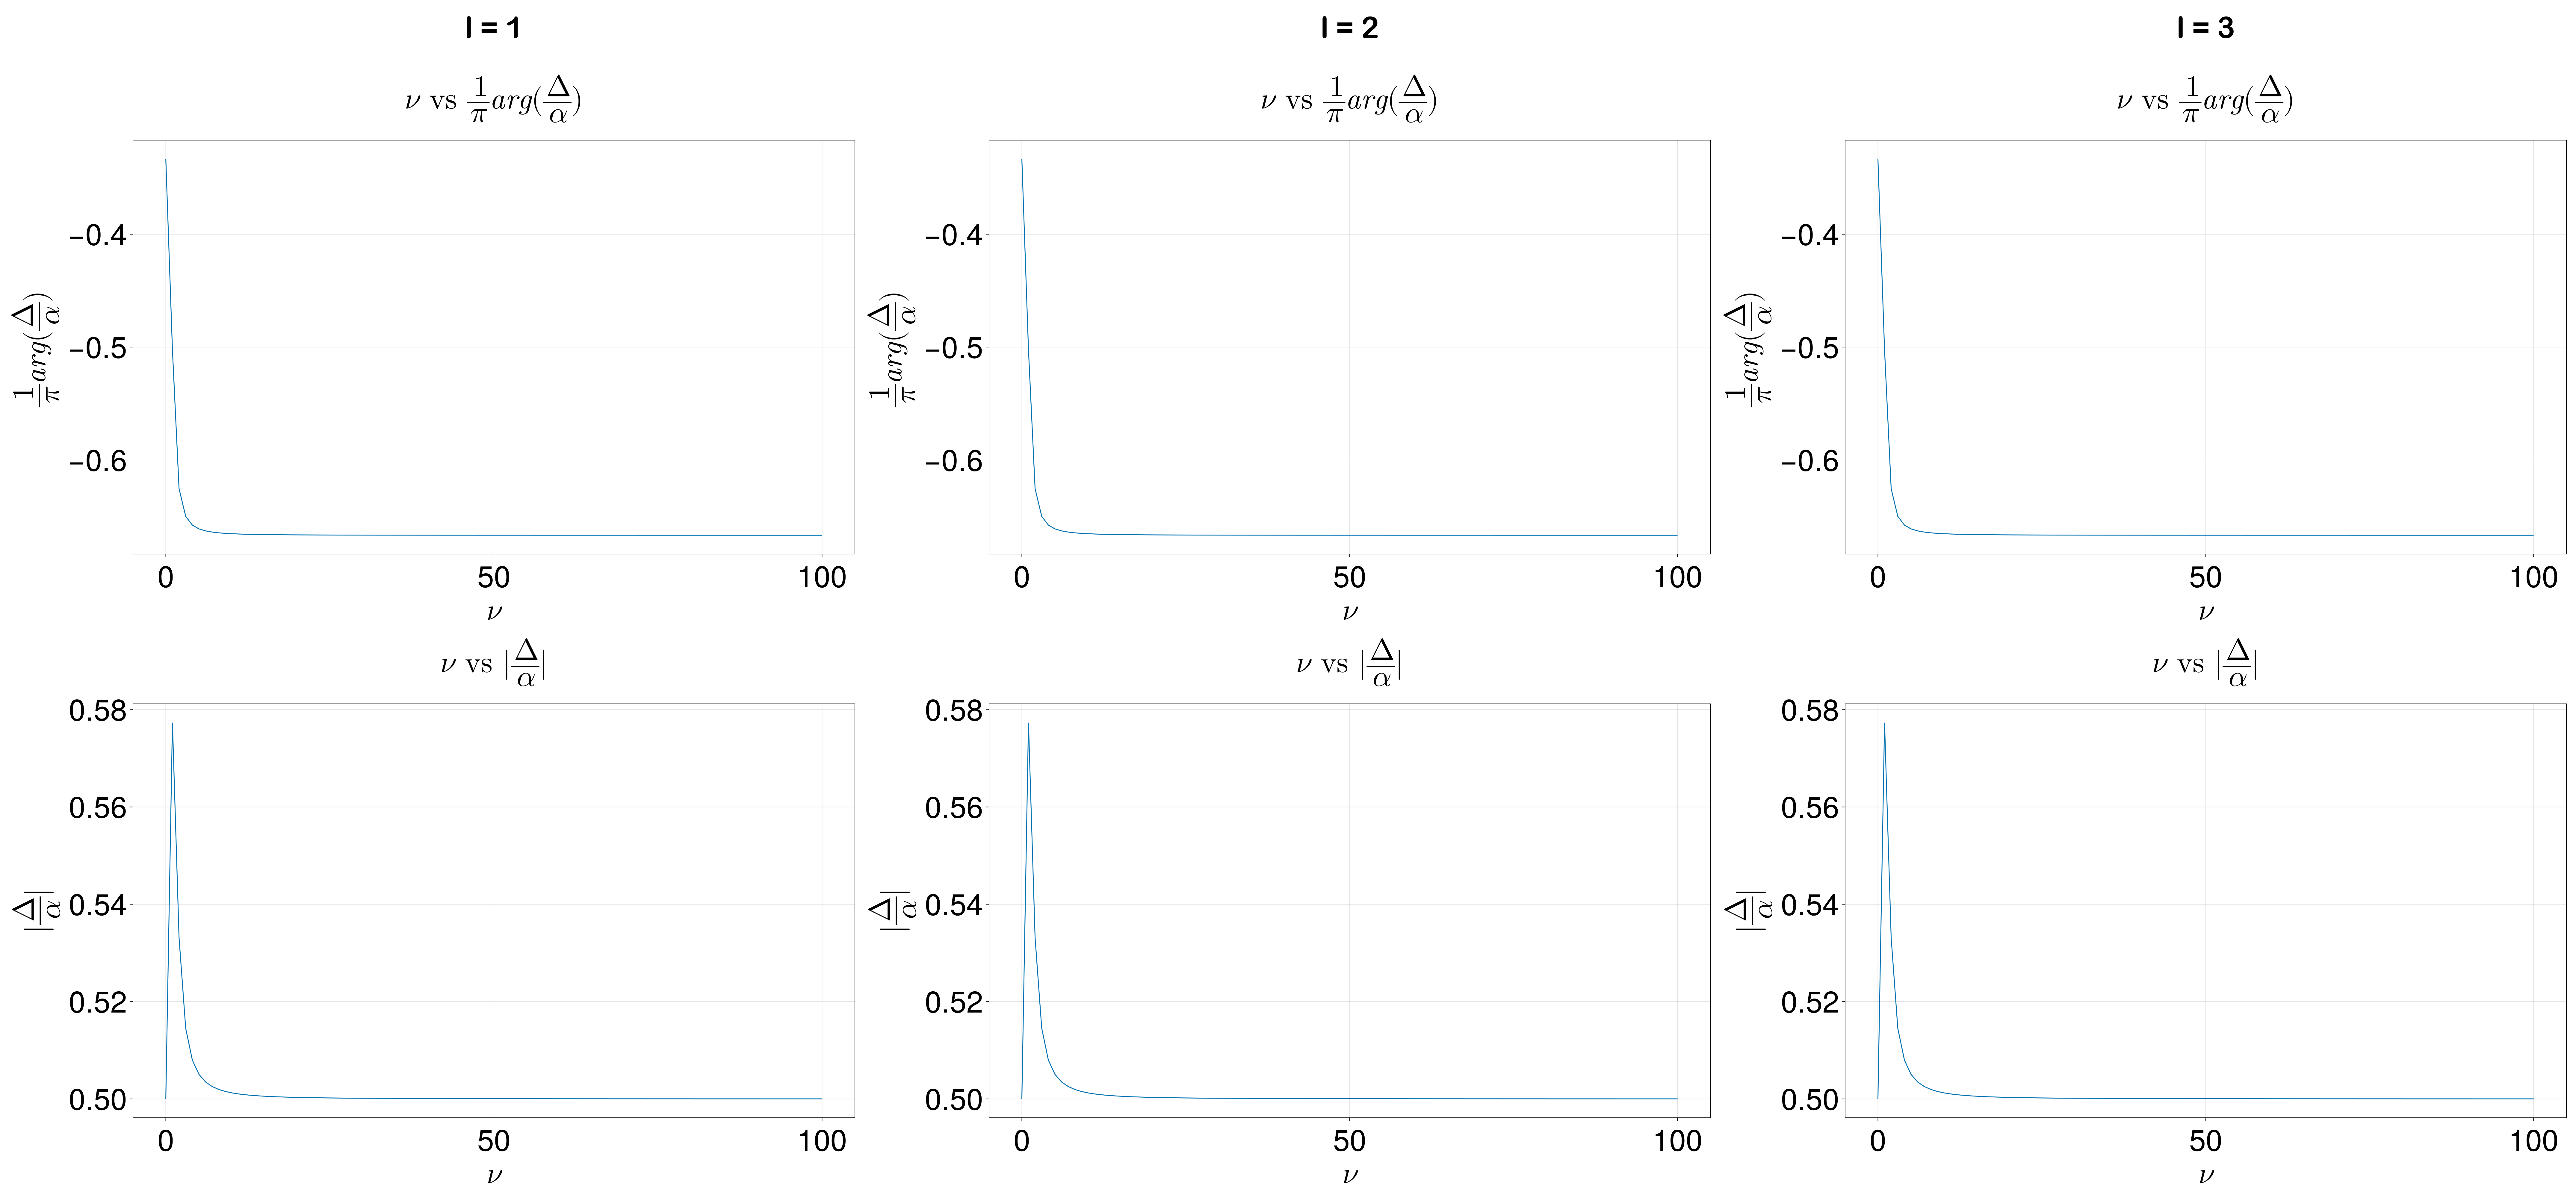

In [68]:
rmg_ratio_nu_Nl_1l(mbz_kappa, Nl)